E:\anaconda\anaconda\envs\class_NetWork\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in exp


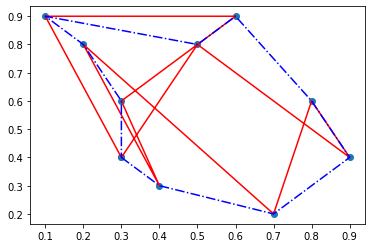

In [2]:
import torch
from numpy import *
import numpy as np
import random
from matplotlib import pyplot as plt

#对输入的网络状态进行变形
#以满足  HopfieldHopfield  神经网络对状态处理的矩阵要求
def d_u(V,distance,m):
    a = np.sum(V, axis=0)-1;  # axis＝0表示按列相加，把每一行加起来，横着的
    b = np.sum(V, axis=1)-1;  # axis＝1表示按行相加，把每一列加起来，竖着的
    y = np.array([[0.0 for i in range(m)] for i in range(m)]);
    x = np.array([[0.0 for i in range(m)] for i in range(m)]);
    for i in range(m):
        for j in range(m):
            x[i, j] = a[j]
    for i in range(m):
        for j in range(m):
            y[j, i] = b[j]
    #创建C
    c_1 = V[:, 1:m]
    c_0 = np.array([[0.0] for i in range(m)])
    c_0[:,0]=V[:,0]
    c = np.concatenate((c_1,c_0), axis=1)  # 行方向的拼接
    c = np.dot(distance,c)
    p = -A * (x + y) - D * c;
    return p;

#计算网络的能量
#对应位置相乘，最后将整个矩阵中的元素值相加，求得该时刻网络状态的能量值
def energy(V,distance):
    a = sum([x*x for x in (np.sum(V, axis=0)-1)]);# axis＝0表示按列相加，把每一行加起来，横着的
    b = sum([x*x for x in (np.sum(V, axis=1)-1)]);# axis＝1表示按行相加，把每一列加起来，竖着的
    c_1 = V[:, 1:m]
    c_0 = np.array([[0.0] for i in range(m)])
    c_0[:,0]=V[:,0]
    c = np.concatenate((c_1, c_0), axis=1);  # 行方向的拼接,将V
    c = np.sum(np.sum(np.multiply(V,np.dot(distance, c)), axis=0));
    e = 0.5*(A*(a+b)+D*c);
    return e

city= np.array([[0.7000,0.2000],[0.4000,0.3000],[0.5000,0.8000],[0.3000,0.4000],[0.1000,0.9000],[0.9000,0.4000],[0.8000,0.6000],[0.6000,0.9000],[0.3000,0.6000],[0.2000,0.8000]]);
m = len(city);
## 将两城市之间的欧氏距离进行计算
distance = np.array([[0.0 for i in range(m)] for i in range(m)]);
for i in range(m):#设置一个欧式距离的对称矩阵
    for j in range(m):
        a = sqrt((city[i,0] - city[j,0]) * (city[i,0] - city[j,0]) + (city[i,1] - city[j,1]) * (city[i,1] - city[j,1]))#计算欧氏距离
        distance[i,j] = a
        distance[j,i] = a

A = 300;
D = 200;
U0 = 0.1;
step = 0.0001; #步长
# 初始化网络状态矩阵
delta=2*(np.random.random((m,m)))-1;
U = U0*log(m-1)+delta;
V = np.array([[0.0 for i in range(m)] for i in range(m)]);
for i in range(m):
    for j in range(m):
        V[i,j]=(1+2/(1+exp(-2*(U[i,j]/U0)))-1)/2;
num_iter = 10000; #迭代次数
#创建大小为1*num_iter的零列表：表示每一步迭代的能量值
ener = np.array([0.0 for x in range(num_iter)]);


for n in range(num_iter):
    dU = d_u(V, distance, m);# 梯度方向
    U = U + dU * step;
    # 网络状态更新
    for i in range(m):
        for j in range(m):
            V[i,j] = (1 + 2 / (1 + exp(-2 * (U[i,j] / U0))) - 1) / 2;
    # 计算网络能量
    e=energy(V,distance);
    ener[n]=e;

(row,col)= V.shape
#V_H为最终状态中每一列的最大值
V_H = np.array([0.0 for i in range(row)]);
#V_W为最大值所在的行的值
V_W = np.array([0 for i in range(row)]);
#进行查找
for i in range(m):
    for j in range(m):
        if V[j,i]>V_H[i]:
            V_H[i]=V[j,i]
            V_W[i]=j
#创建一个数组将V中每列最大值的位置设为1，其他设为0
V_1 = np.array([[0 for i in range(row)] for i in range(col)]);
for i in range(col):
    V_1[V_W[i],i]=1
#判断每个点是否只去过一次
C = np.sum(V_1, axis=0);
R = np.sum(V_1, axis=1);
test = 1;#设立监控
for i in range(m):
    if C[i]!=1 or R[i]!=1:
        test=0

if test == 1:
    #创建两个数组，一个记录最大值，另一个记录最大值所在的行
    V_1H = np.array([0.0 for i in range(m)]);
    V_1W = np.array([0 for i in range(m)]);
    for i in range(m):
        for j in range(m):
            if V_1[j, i] > V_1H[i]:
                V_1H[i] = V_1[j, i]
                V_1W[i] = j
    #随机一种路径和优化后的路径进行比较
    city_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    V_0W = random.sample(list(city_i), 10)
    #创建两个城市矩阵，将他们按照我们所给的初始顺序和最终顺序进行排序
    city_b = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]);
    city_f = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]);
    k=np.array([0,1,2,3,4,5,6,7,8,9])
    k=[city[i] for i in V_0W]
    for i in range(m):
        city_b[i]=k[i]
    j=np.array([0,1,2,3,4,5,6,7,8,9])
    j=[city[i] for i in V_1W]
    for i in range(m):
        city_f[i]=j[i]
    #下面将坐标点的X，Y轴数值分别提取进行画图
    X_b=[]
    Y_b=[]
    X_f=[]
    Y_f=[]
    for i in range(m):
        X_b.append(city_b[i][0])
        Y_b.append(city_b[i][1])
        X_f.append(city_f[i][0])
        Y_f.append(city_f[i][1])
    #将第一个点加入，因为要回到初始点
    X_b.append(city_b[0][0])
    Y_b.append(city_b[0][1])
    X_f.append(city_f[0][0])
    Y_f.append(city_f[0][1])
    plt.plot(X_b,Y_b,'r',X_f, Y_f, '-.b')
    plt.scatter(X_f,Y_f)
    plt.show()
else:
    print('No optimal path')